<a href="https://colab.research.google.com/github/jaeryong77/Actto/blob/master/KU_NLP_KERAS_%EA%B8%B0%EC%B4%88%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np
from keras.utils import to_categorical

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000) #데이터 로딩 + 자주 나타나는 단어 1만개만 사용하겠다. => 적절한 크기의 벡터 데이터를 얻기 위함.


17465344/17464789 [==============================] - 0s 0us/step


In [3]:
# print(type(train_data))
# print(train_data.shape)

# arr = np.array([[1,2,3],[4,5,6]])
# arr.shape
# print(arr[1,1])

print('train_data.shape  :' ,train_data.shape)
print('train_labels.shape : ',train_labels.shape)
print('test_data.shape  : ', test_data.shape )
print('test_labels.shape :' , test_labels.shape)
print('데이터들의 shape 를 보면 25000 행의 데이터임 ')
print('\n')

print('train_data :', train_data[:5],'\n')
print('train_labels :', train_labels[:5],'\n')
print('test_data :',test_data[:5],'\n')
print('test_labels :',test_labels[:5])
print('train_data 샘플을 보면 각 행은 숫자로 이루어진 리스트 이며 각 숫자는 단어를 치환해 놓은 값임')
print('trina_labels 샘플을 보면 각 행의 긍정 부정 값임')

train_data.shape  : (25000,)
train_labels.shape :  (25000,)
test_data.shape  :  (25000,)
test_labels.shape : (25000,)
데이터들의 shape 를 보면 25000 행의 데이터임 


train_data : [list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224,

In [7]:
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np
from keras.utils import to_categorical

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000) #데이터 로딩 + 자주 나타나는 단어 1만개만 사용하겠다. => 적절한 크기의 벡터 데이터를 얻기 위함.

def make_one_hot(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension)) #10000차원으로 개수만큼 
  
  cnt = 0
  for i,sequence in enumerate(sequences):
    print(i,sequence)
    results[i,sequence]=1. #results[i]에서 특정 인덱스의 위치를 1로 만듭니다    
    print(i,results[i,:100])    
    cnt += 1
    if cnt > 5 :break
  return results

x_train=make_one_hot(train_data)
x_test=make_one_hot(test_data)

print('x_train 샘플')
print(x_train[:5,:50] )

0 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
0 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1

In [14]:
print(train_labels.dtype)
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

print(y_train.shape)
print(y_train[:5,])
print(y_train.dtype)

int64
(25000,)
[1. 0. 0. 1. 0.]
float32


Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5087 - binary_accuracy: 0.7875 - val_loss: 0.3795 - val_binary_accuracy: 0.8702
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3042 - binary_accuracy: 0.9011 - val_loss: 0.3037 - val_binary_accuracy: 0.8872
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2238 - binary_accuracy: 0.9257 - val_loss: 0.2796 - val_binary_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1759 - binary_accuracy: 0.9421 - val_loss: 0.2763 - val_binary_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1437 - binary_accuracy: 0.9545 - val_loss: 0.2831 - val_binary_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1184 - binary_accuracy: 0.9634 - val_loss: 0.2955 - val_binary_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - los

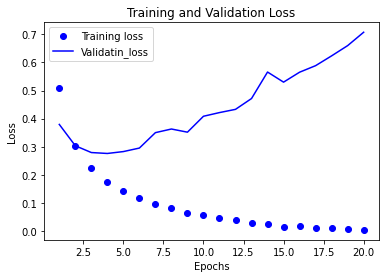

782/782 [==============================] - 1s 1ms/step - loss: 0.7852 - binary_accuracy: 0.8474
Results:  [0.7851606011390686, 0.8474400043487549]
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: KU_NLP/assets


In [15]:
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np
from keras.utils import to_categorical

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000) #데이터 로딩 + 자주 나타나는 단어 1만개만 사용하겠다. => 적절한 크기의 벡터 데이터를 얻기 위함.

def make_one_hot(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension)) #10000차원으로 개수만큼 

  for i,sequence in enumerate(sequences):
    results[i,sequence]=1. #results[i]에서 특정 인덱스의 위치를 1로 만듭니다
  return results

x_train=make_one_hot(train_data)
x_test=make_one_hot(test_data)

y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

#모델 정의
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid')) #긍정이냐 부정이냐 !

#binary_crossentropy는 정보이론에서 온 개념으로 확률 분포간의 차이를 측정한다.(이진 분류에서 사용한다)
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

#또 다른 방법
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

#또 다른 방법
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

#검증 데이터 만들기
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

#훈련하기
#model.fit이 History객체를 반환한다.
#객체는 (acc,loss,val_acc,val_loss))를 딕셔너리 형태로 가지고 있다.
#검증 데이터는 validation_data에 전달한다.
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

#시각화 하기 - 훈련과 검증 손실
import matplotlib.pyplot as plt

history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validatin_loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()


#성능 측정
results=model.evaluate(x_test,y_test)
print("Results: ",results)

from keras.models import load_model
model.save('KU_NLP') #모델 저장하기